# 0. 라이브러리 준비

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화

# 1. 데이터 호출 및 정제 

## 1.1. 데이터 확인

In [5]:
metro_df = pd.read_csv('./dataset/서울시 지하철 승하차 인원 정보.csv',encoding = 'cp949')

In [6]:
metro_df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,5983,7,1043,2,2,0,2,0,0,20210903
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,1759,4,827,0,0,0,0,0,0,20210903
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,4968,21,444,1,1,0,0,0,0,20210903
3,202108,1호선,시청,6,0,1597,4399,2727,17957,5971,...,822,3,72,0,2,0,0,0,0,20210903
4,202108,1호선,신설동,247,6,6828,2721,7333,9771,14821,...,3747,15,390,0,0,0,0,0,0,20210903


In [7]:
# 데이터 프레임 정보 요약
metro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46552 entries, 0 to 46551
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           46552 non-null  int64 
 1   호선명           46552 non-null  object
 2   지하철역          46552 non-null  object
 3   04시-05시 승차인원  46552 non-null  int64 
 4   04시-05시 하차인원  46552 non-null  int64 
 5   05시-06시 승차인원  46552 non-null  int64 
 6   05시-06시 하차인원  46552 non-null  int64 
 7   06시-07시 승차인원  46552 non-null  int64 
 8   06시-07시 하차인원  46552 non-null  int64 
 9   07시-08시 승차인원  46552 non-null  int64 
 10  07시-08시 하차인원  46552 non-null  int64 
 11  08시-09시 승차인원  46552 non-null  int64 
 12  08시-09시 하차인원  46552 non-null  int64 
 13  09시-10시 승차인원  46552 non-null  int64 
 14  09시-10시 하차인원  46552 non-null  int64 
 15  10시-11시 승차인원  46552 non-null  int64 
 16  10시-11시 하차인원  46552 non-null  int64 
 17  11시-12시 승차인원  46552 non-null  int64 
 18  11시-12시 하차인원  46552 non-null  int64 
 19  12시-

In [8]:
# 데이터 확인하기
# 사용월
month = sorted(list(set(metro_df['사용월'])))
print(month)

[201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108]


## 1.2. 데이터 정제
### 2020년 이전의 데이터만 추출

In [9]:
# 2020년 이후의 데이터만 수집하여 코로나 이후 지하철 유동 인구를 분석
# 전체 46552개의 데이터 중 12049개 추출
metro_before_corona = metro_df[(metro_df['사용월']>201804) & (metro_df['사용월']< 202000)]
metro_before_corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11896 entries, 12049 to 23944
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           11896 non-null  int64 
 1   호선명           11896 non-null  object
 2   지하철역          11896 non-null  object
 3   04시-05시 승차인원  11896 non-null  int64 
 4   04시-05시 하차인원  11896 non-null  int64 
 5   05시-06시 승차인원  11896 non-null  int64 
 6   05시-06시 하차인원  11896 non-null  int64 
 7   06시-07시 승차인원  11896 non-null  int64 
 8   06시-07시 하차인원  11896 non-null  int64 
 9   07시-08시 승차인원  11896 non-null  int64 
 10  07시-08시 하차인원  11896 non-null  int64 
 11  08시-09시 승차인원  11896 non-null  int64 
 12  08시-09시 하차인원  11896 non-null  int64 
 13  09시-10시 승차인원  11896 non-null  int64 
 14  09시-10시 하차인원  11896 non-null  int64 
 15  10시-11시 승차인원  11896 non-null  int64 
 16  10시-11시 하차인원  11896 non-null  int64 
 17  11시-12시 승차인원  11896 non-null  int64 
 18  11시-12시 하차인원  11896 non-null  int64 
 19  

### 2020년 이후의 데이터 추출


In [10]:
# 2020년 이전의 데이터만 수집하여 코로나 이전 지하철 유동 인구를 분석
metro_after_corona = metro_df[metro_df['사용월']> 202000]
metro_after_corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12049 entries, 0 to 12048
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           12049 non-null  int64 
 1   호선명           12049 non-null  object
 2   지하철역          12049 non-null  object
 3   04시-05시 승차인원  12049 non-null  int64 
 4   04시-05시 하차인원  12049 non-null  int64 
 5   05시-06시 승차인원  12049 non-null  int64 
 6   05시-06시 하차인원  12049 non-null  int64 
 7   06시-07시 승차인원  12049 non-null  int64 
 8   06시-07시 하차인원  12049 non-null  int64 
 9   07시-08시 승차인원  12049 non-null  int64 
 10  07시-08시 하차인원  12049 non-null  int64 
 11  08시-09시 승차인원  12049 non-null  int64 
 12  08시-09시 하차인원  12049 non-null  int64 
 13  09시-10시 승차인원  12049 non-null  int64 
 14  09시-10시 하차인원  12049 non-null  int64 
 15  10시-11시 승차인원  12049 non-null  int64 
 16  10시-11시 하차인원  12049 non-null  int64 
 17  11시-12시 승차인원  12049 non-null  int64 
 18  11시-12시 하차인원  12049 non-null  int64 
 19  12시-

### 동작구 흑석역 주변 지하철역 데이터만 추출

In [11]:
# 모든 지하철명 출력
name = list(set(metro_df['지하철역']))
print(name)

['압구정로데오', '서울역', '잠원', '총신대입구(이수)', '중화', '아신', '인하대', '신답', '효창공원앞', '구산', '야탑', '홍제', '안양', '신도림', '상봉', '부개', '뚝섬유원지', '삼동', '동암', '양평', '초지', '온수(성공회대입구)', '봉명', '부천시청', '신내', '광명사거리', '용두', '미아', '새절(신사)', '도화', '용마산(용마폭포공원)', '을지로4가', '삼성(무역센터)', '연신내', '천마산', '삼성중앙', '흑석(중앙대입구)', '대야미', '김유정', '대치', '양정', '독산', '공항화물청사', '화전', '금촌', '가능', '구파발', '당산', '을지로입구', '신촌', '굴봉산', '일산', '잠실새내', '도봉', '마장', '응봉', '미사', '신이문', '성신여대입구', '오산', '구반포', '길동', '쌍용동', '노량진', '굴포천', '도곡', '마들', '범계', '상동', '모란', '종로3가', '국회의사당', '오목교(목동운동장앞)', '명일', '인천', '용문', '영종', '연수', '몽촌토성', '발산', '강변', '광운대', '신방화', '반포', '제기동', '세류', '왕십리', '뚝섬', '광흥창', '구의', '청라국제도시', '금곡', '소요산', '매봉', '청량리(지상)', '제물포', '화랑대(서울여대입구)', '솔샘', '별내', '상월곡(한국과학기술연구원)', '미아(서울사이버대학)', '청담', '잠실나루', '오빈', '부발', '공릉', '응암', '학여울', '단대오거리', '숭실대입구(살피재)', '장지', '청평', '삼성', '성신여대입구(돈암)', '어린이대공원', '복정', '부천', '망포', '상도', '행신', '서강대', '반월', '검암', '샛강', '대모산입구', '남한산성입구', '길음', '버티고개', '독립문', '수원', '사리', '강동구청', '관악', '수서', '4.19민

In [12]:
dj = ['흑석(중앙대입구)','상도','숭실대입구(살피재)','동작(현충원)','총신대입구(이수)','노들','노량진','장승배기','신대방삼거리' ]
before_dj = metro_before_corona[metro_before_corona['지하철역'].isin(dj)].reset_index(drop=True)
after_dj = metro_after_corona[metro_after_corona['지하철역'].isin(dj)].reset_index(drop=True)

In [13]:
before_dj['지하철역'].value_counts()

동작(현충원)       40
노량진           40
총신대입구(이수)     20
신대방삼거리        20
장승배기          20
노들            20
상도            20
흑석(중앙대입구)     20
숭실대입구(살피재)    20
Name: 지하철역, dtype: int64

### 불필요한 데이터 삭제 : 작업일자

In [14]:
before_dj = before_dj.drop(columns=['작업일자'])
after_dj = after_dj.drop(columns=['작업일자'])

In [15]:
before_dj.head(3)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,201912,4호선,동작(현충원),34,0,349,158,1307,2113,5102,...,689,2193,172,1156,6,200,0,11,0,0
1,201912,4호선,총신대입구(이수),151,9,6772,1131,17034,11640,47930,...,14399,21414,2248,6256,33,564,0,0,0,0
2,201912,7호선,상도,0,0,4599,3357,11091,8673,32208,...,6903,14379,1395,4769,13,100,0,0,0,0


### 호선 합치기

In [16]:
before_line = before_dj.groupby(['지하철역','사용월']).sum().reset_index()
after_line = after_dj.groupby(['지하철역','사용월']).sum().reset_index()

before_line

,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,노들,201805,36,1,3600,270,6255,1618,19051,2691,...,1129,5388,224,1704,0,2,0,0,1,0
1,노들,201806,32,0,3456,258,6148,1588,18379,2613,...,1231,5089,182,1478,0,4,0,0,0,0
2,노들,201807,30,0,3571,280,6666,1625,19767,2939,...,1130,5002,200,1591,0,0,0,0,0,0
3,노들,201808,26,0,3272,297,6134,1550,18842,2805,...,1063,4693,200,1687,0,10,0,0,0,0
4,노들,201809,13,0,3271,268,5471,1573,16875,2521,...,1003,4662,172,1275,2,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,흑석(중앙대입구),201908,1,0,3538,905,6141,4695,17892,11164,...,4626,10908,881,3255,0,70,0,0,0,0
176,흑석(중앙대입구),201909,6,1,3361,975,5936,4651,17856,10931,...,6740,10297,1462,3133,2,91,0,0,0,0
177,흑석(중앙대입구),201910,11,1,3731,1109,6392,5315,19263,12400,...,7965,11505,1703,3441,0,50,0,0,0,0
178,흑석(중앙대입구),201911,9,1,3703,965,6152,4973,17741,12314,...,7381,11617,1669,3620,1,69,0,0,0,0


### 승,하차 인원 합치기 (승차 + 하차 = 유동인구)


In [17]:
columns = before_line.columns.tolist()
columns = columns[2:]
print(columns)

['04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원', '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원', '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원', '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원', '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원', '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원', '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원', '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원', '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원', '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원', '03시-04시 하차인원']


In [18]:
times = []
for i in columns:
    i = i.strip('승차인원')
    i = i.strip('하차인원')
    times.append(i)


# 중복 제거
time = []
for v in times :
    if v not in time :
        time.append(v)
print(time)

['04시-05시 ', '05시-06시 ', '06시-07시 ', '07시-08시 ', '08시-09시 ', '09시-10시 ', '10시-11시 ', '11시-12시 ', '12시-13시 ', '13시-14시 ', '14시-15시 ', '15시-16시 ', '16시-17시 ', '17시-18시 ', '18시-19시 ', '19시-20시 ', '20시-21시 ', '21시-22시 ', '22시-23시 ', '23시-24시 ', '00시-01시 ', '01시-02시 ', '02시-03시 ', '03시-04시 ']


In [19]:
before_total = pd.DataFrame()
after_total = pd.DataFrame()

before_total['지하철역'] = before_line['지하철역']
before_total['사용월'] = before_line['사용월']

after_total['지하철역'] = after_line['지하철역']
after_total['사용월'] = after_line['사용월']

for i in range(len(time)) :
    before_total[time[i]] = before_line[columns[2*i]] + before_line[columns[2*i+1]]
    after_total[time[i]] = after_line[columns[2*i]] + after_line[columns[2*i+1]]

before_total

,지하철역,사용월,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,노들,201805,37,3870,7873,21742,26624,18137,13593,11766,...,22284,18339,12489,11775,12476,6517,1928,2,0,1
1,노들,201806,32,3714,7736,20992,24873,17440,12940,11099,...,21801,17200,11944,11170,11649,6320,1660,4,0,0
2,노들,201807,30,3851,8291,22706,27966,18201,13358,11617,...,24046,18862,12930,11635,12082,6132,1791,0,0,0
3,노들,201808,26,3569,7684,21647,26108,17272,13162,11071,...,23534,18510,12491,11321,11374,5756,1887,10,0,0
4,노들,201809,13,3539,7044,19396,23373,16564,13067,11140,...,20775,16203,10811,10219,10581,5665,1447,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,흑석(중앙대입구),201908,1,4443,10836,29056,41370,31879,25503,25699,...,47536,36110,25823,22929,23309,15534,4136,70,0,0
176,흑석(중앙대입구),201909,7,4336,10587,28787,51220,35954,34092,28981,...,55837,39675,28667,27584,25717,17037,4595,93,0,0
177,흑석(중앙대입구),201910,12,4840,11707,31663,53762,41194,36547,31935,...,59866,42021,31107,29774,28282,19470,5144,50,0,0
178,흑석(중앙대입구),201911,10,4668,11125,30055,58338,42395,36949,32765,...,62143,42440,30603,28971,27732,18998,5289,70,0,0


### 가게 영업 시간대(13시 ~ 20시)의 데이터만 추출

In [20]:
before_YS = before_total[['지하철역','사용월',
 '13시-14시 ',
 '14시-15시 ',
 '15시-16시 ',
 '16시-17시 ',
 '17시-18시 ',
 '18시-19시 ',
 '19시-20시 ']]

after_YS = after_total[['지하철역','사용월',
 '13시-14시 ',
 '14시-15시 ',
 '15시-16시 ',
 '16시-17시 ',
 '17시-18시 ',
 '18시-19시 ',
 '19시-20시 ']]

In [21]:
# 정제 완료된 데이터 : before_YS
# 2020년 1월 ~ 2021년 8월까지의 동작구 지하철역(9개) 유동인구 데이터
# '흑석(중앙대입구)','상도','숭실대입구(살피재)','동작(현충원)','총신대입구(이수)','노들','노량진','장승배기','신대방삼거리' 
before_YS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지하철역      180 non-null    object
 1   사용월       180 non-null    int64 
 2   13시-14시   180 non-null    int64 
 3   14시-15시   180 non-null    int64 
 4   15시-16시   180 non-null    int64 
 5   16시-17시   180 non-null    int64 
 6   17시-18시   180 non-null    int64 
 7   18시-19시   180 non-null    int64 
 8   19시-20시   180 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 12.8+ KB


In [22]:
# 정제 완료된 데이터 : after_YS
# 2018년 5월 ~ 2019년 12월까지의 동작구 지하철역(9개) 유동인구 데이터
# '흑석(중앙대입구)','상도','숭실대입구(살피재)','동작(현충원)','총신대입구(이수)','노들','노량진','장승배기','신대방삼거리' 
after_YS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지하철역      180 non-null    object
 1   사용월       180 non-null    int64 
 2   13시-14시   180 non-null    int64 
 3   14시-15시   180 non-null    int64 
 4   15시-16시   180 non-null    int64 
 5   16시-17시   180 non-null    int64 
 6   17시-18시   180 non-null    int64 
 7   18시-19시   180 non-null    int64 
 8   19시-20시   180 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 12.8+ KB


# 2. 데이터 분석

In [23]:
before_YS.head(20)

,지하철역,사용월,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시
0,노들,201805,13907,13039,13460,14241,17489,22284,18339
1,노들,201806,13317,12248,13140,13780,17119,21801,17200
2,노들,201807,13704,12126,12993,13732,17245,24046,18862
3,노들,201808,13012,11487,12851,13501,16940,23534,18510
4,노들,201809,13004,11913,12762,13770,16757,20775,16203
5,노들,201810,13669,12562,13537,15926,18326,25322,19888
6,노들,201811,13505,11935,13110,14944,17487,23449,17791
7,노들,201812,13942,12810,13315,15400,17815,21467,16229
8,노들,201901,13644,12606,12879,14066,16758,22638,17645
9,노들,201902,12112,11012,11216,12850,14561,18667,14669


In [24]:
after_YS.head(20)

,지하철역,사용월,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시
0,노들,202001,13201,12021,13710,13895,16307,21842,16719
1,노들,202002,9936,8927,10152,10181,13269,19122,14919
2,노들,202003,7776,7065,8222,8487,11334,17209,13103
3,노들,202004,8463,7965,8959,9509,12122,17597,13265
4,노들,202005,10160,9520,10513,11263,13698,19405,14126
5,노들,202006,9979,8659,10592,11374,14186,21283,15437
6,노들,202007,10566,9767,11313,12661,15761,22787,16376
7,노들,202008,9466,8573,10177,10607,13938,19742,14355
8,노들,202009,8640,8504,9843,10224,13229,18871,13453
9,노들,202010,10717,9951,11411,12163,15097,20269,14600


## 2.1. 시간대별 평균 유동인구

In [25]:
before_mean = before_YS.groupby(['지하철역']).mean().reset_index().drop(columns='사용월') # 지하철역 마다 평균 계산
after_mean = after_YS.groupby(['지하철역']).mean().reset_index().drop(columns='사용월') # 지하철역 마다 평균 계산

In [26]:
before_mean

,지하철역,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시
0,노들,13783.00,12494.10,13334.60,14831.40,17438.10,22762.20,17715.30
1,노량진,133045.35,116314.25,120726.10,136921.00,175471.10,246132.85,167780.00
2,동작(현충원),16741.65,16093.05,17556.45,17598.15,19426.00,23585.25,15453.70
3,상도,33319.40,33089.30,34234.10,40678.70,47382.20,62364.75,45198.40
4,숭실대입구(살피재),46774.15,45010.25,45221.60,57297.50,66262.95,80134.80,62843.70
5,신대방삼거리,43595.45,42691.85,45990.65,51564.10,60961.80,93816.75,73724.95
6,장승배기,33050.55,31465.75,33814.85,36914.35,42714.50,58456.65,44296.20
7,총신대입구(이수),72274.50,72619.75,77442.90,86107.20,101408.45,140661.80,101673.50
8,흑석(중앙대입구),33345.40,32453.75,35407.75,40090.15,49674.90,54489.45,39437.35


In [27]:
after_mean

,지하철역,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시
0,노들,9864.00,9203.50,10465.00,11202.65,13883.05,19946.20,14412.30
1,노량진,87541.45,76192.15,81588.80,93261.20,128895.20,183533.00,115333.75
2,동작(현충원),11189.30,11695.45,12546.85,13766.75,16246.20,20853.80,12752.85
3,상도,23271.85,22577.20,24188.50,28915.80,36350.60,50147.45,34918.10
4,숭실대입구(살피재),27687.90,26659.35,28656.75,33882.50,43711.85,58398.85,43171.95
5,신대방삼거리,32925.35,32755.35,35663.55,41125.05,51855.55,83030.95,59736.95
6,장승배기,22620.80,22058.05,23835.85,26519.10,32270.65,46584.05,33664.10
7,총신대입구(이수),51234.95,52002.85,55802.75,63008.40,77693.55,109576.00,71461.05
8,흑석(중앙대입구),20692.20,19393.55,22190.65,25186.50,32494.50,37526.90,24768.40


## 2.2. 코로나 이전 각 지하철역 별  시간대 유동인구 그래프 by matplotlib.pyplot

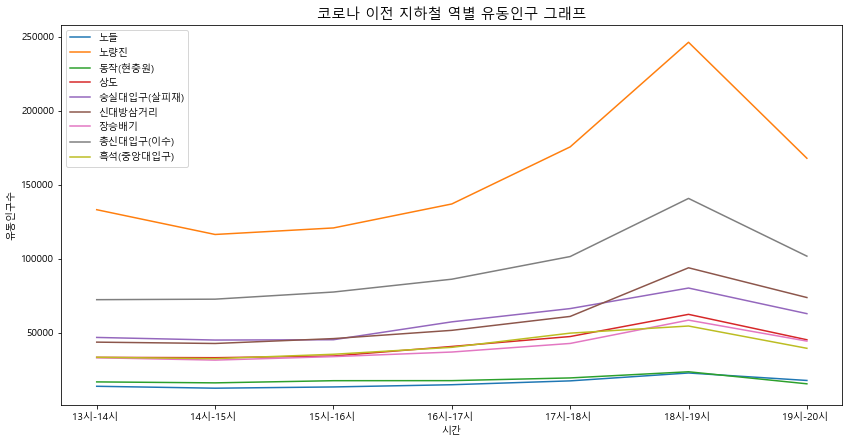

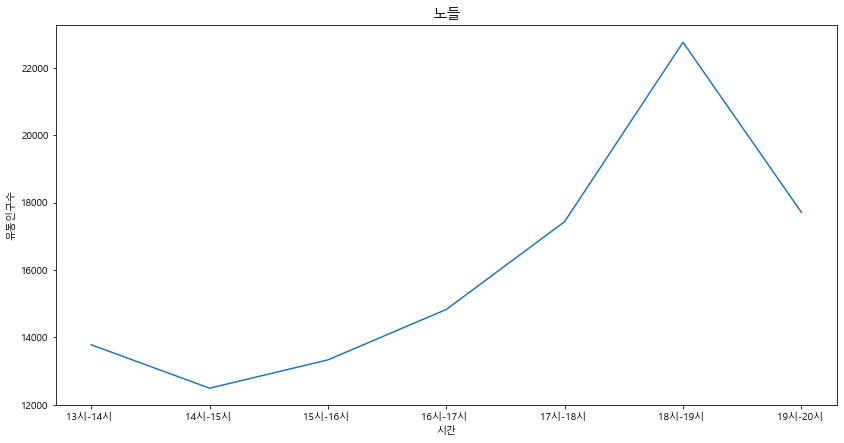

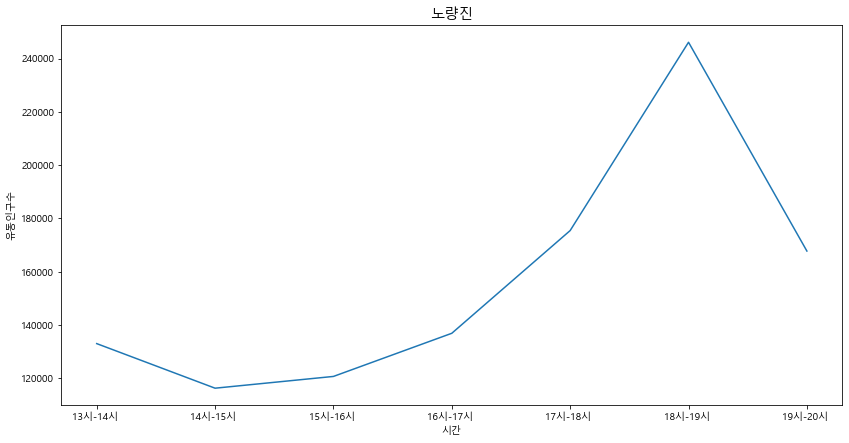

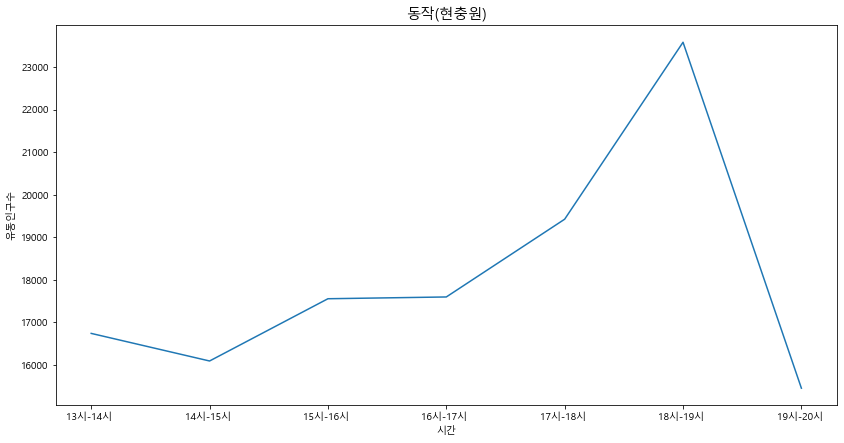

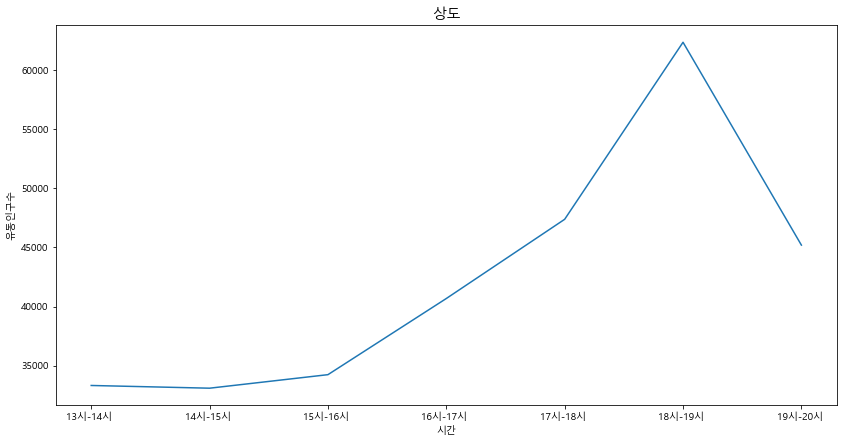

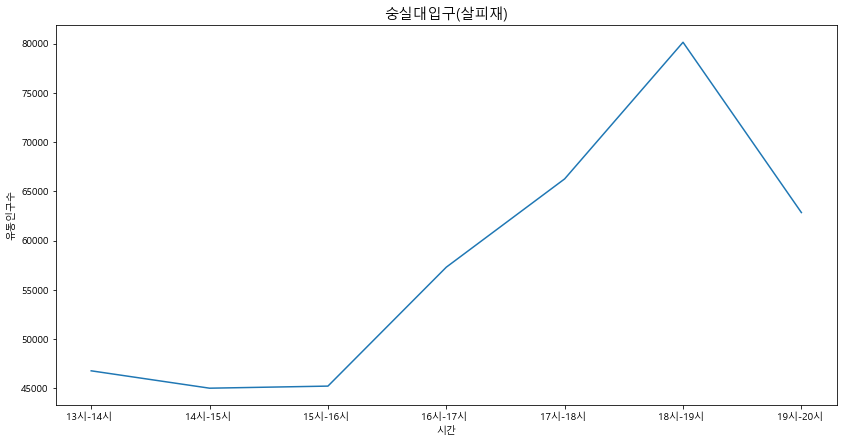

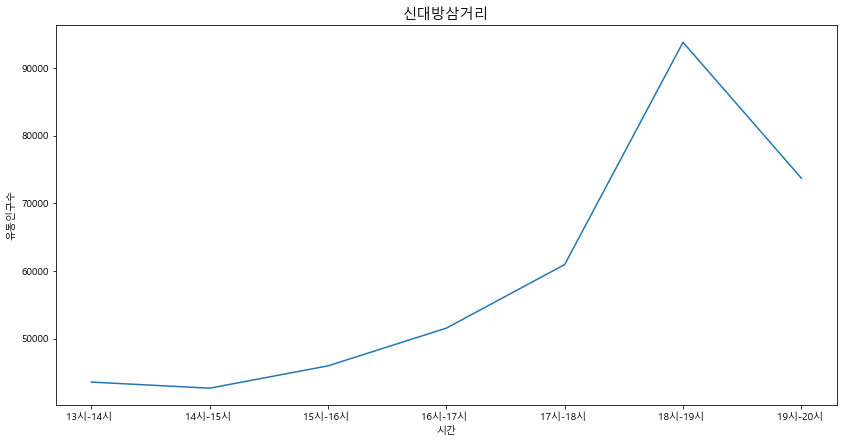

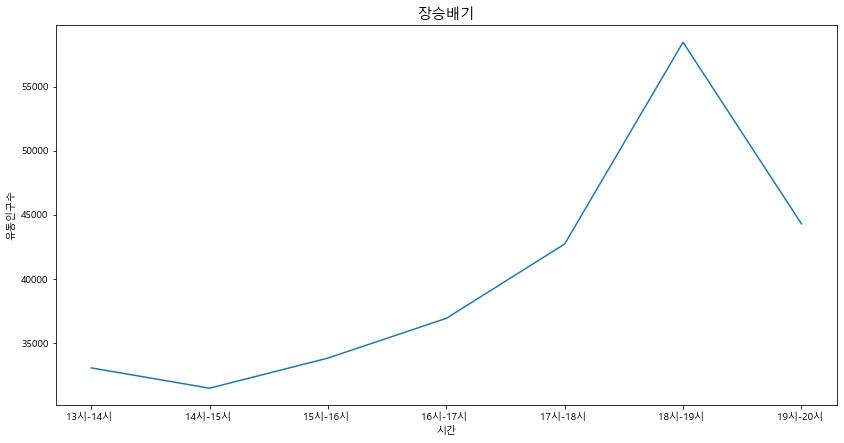

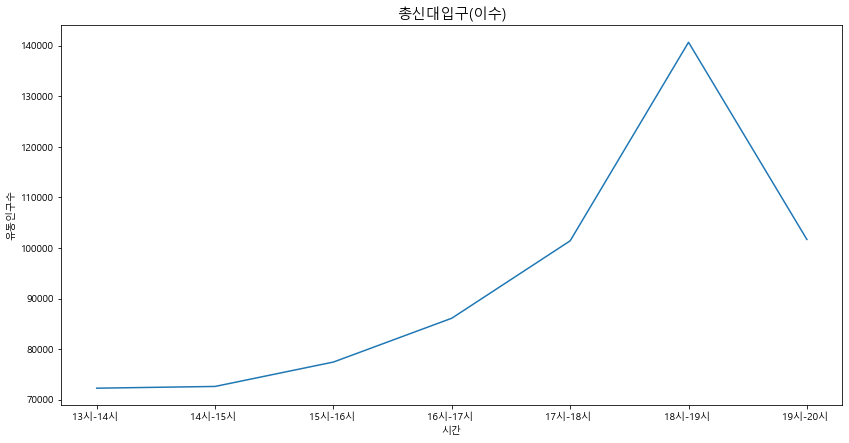

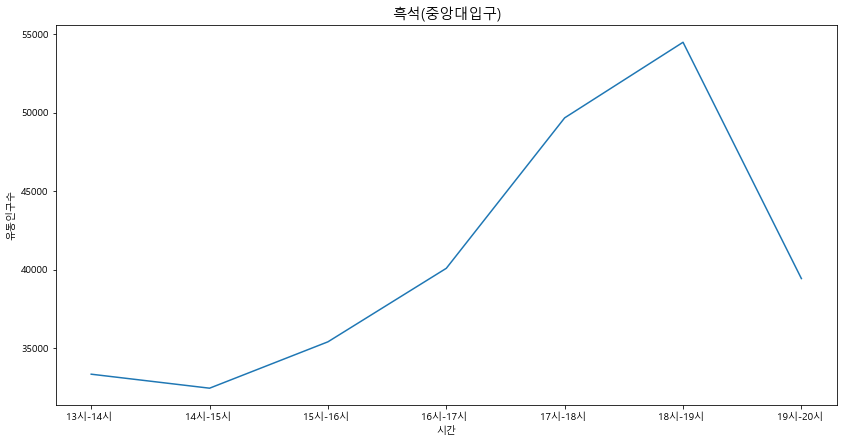

In [28]:
#1) 지하철 역별 그래프 그리기_merged_계속 figsize 바꾸면 다른 그래프로 출력됨.(for loop)
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/MALGUN.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(14, 7))
plt.xlabel('시간')
plt.ylabel('유동인구수')
plt.title('코로나 이전 지하철 역별 유동인구 그래프', fontsize='x-large')

for i in range(len(before_mean.index)):
    df_plot_merged = before_mean.iloc[i, 1:]
    plt.plot(df_plot_merged, label = before_mean['지하철역'][i])
    plt.legend(fontsize='medium')
    
#2) 지하철 역별 그래프_separated
for j in range(len(before_mean.index)):
    df_plot_separated = before_mean.iloc[j, 1:]
    plt.figure(figsize=(14, 7))
    plt.plot(df_plot_separated)
    plt.title(before_mean['지하철역'][j], fontsize='x-large')
    plt.xlabel('시간')
    plt.ylabel('유동인구수')
    plt.show()

## 2.3. 코로나 이후 각 지하철역 별  시간대 유동인구 그래프 by matplotlib.pyplot

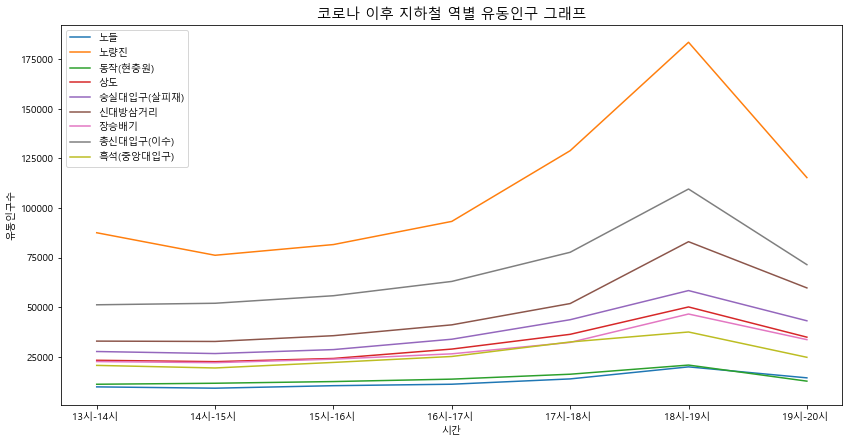

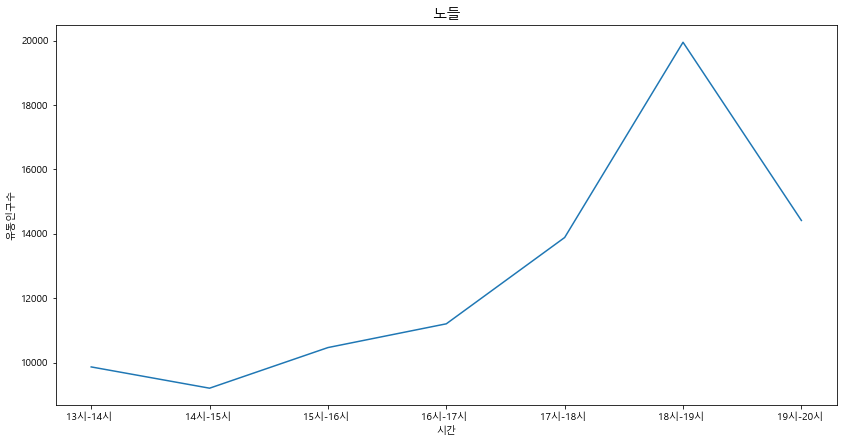

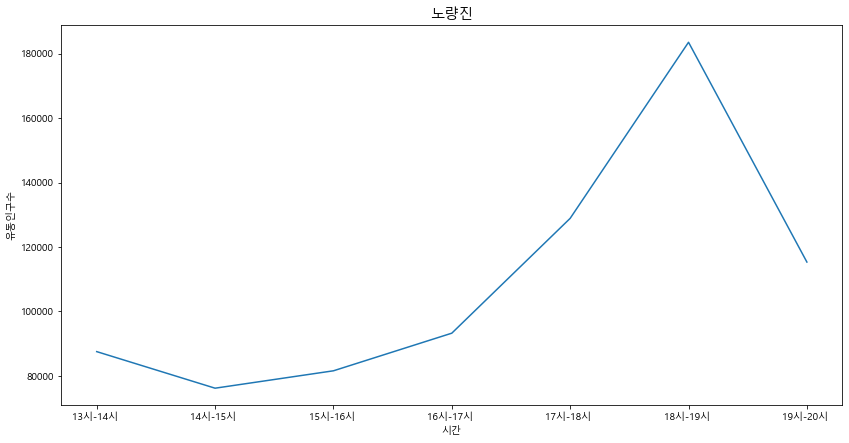

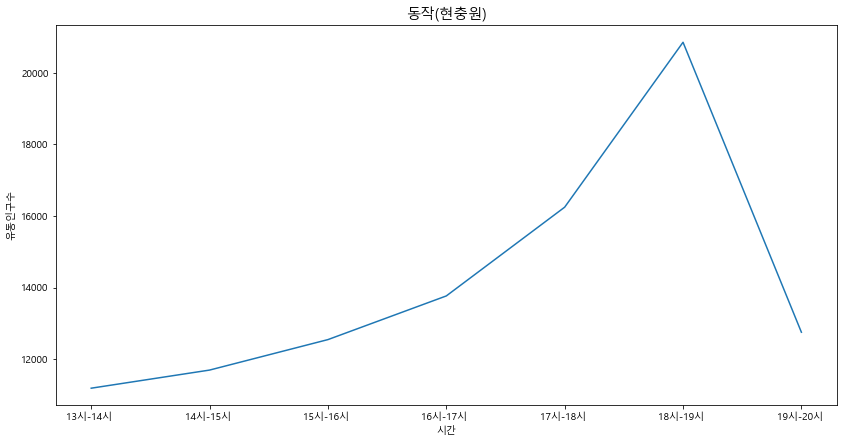

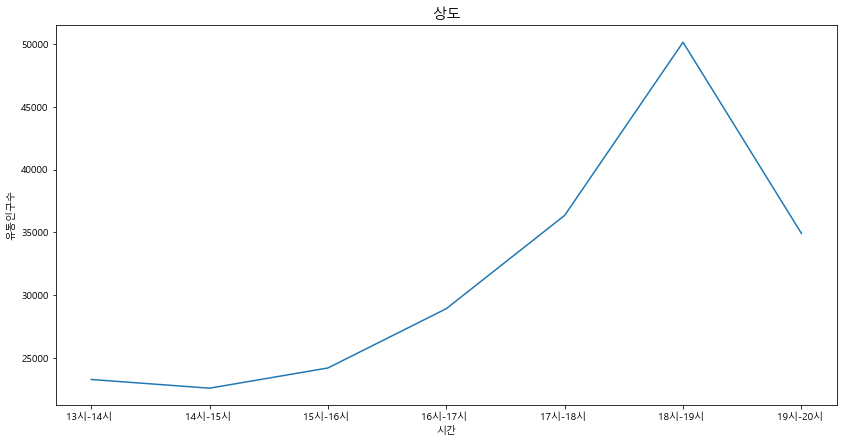

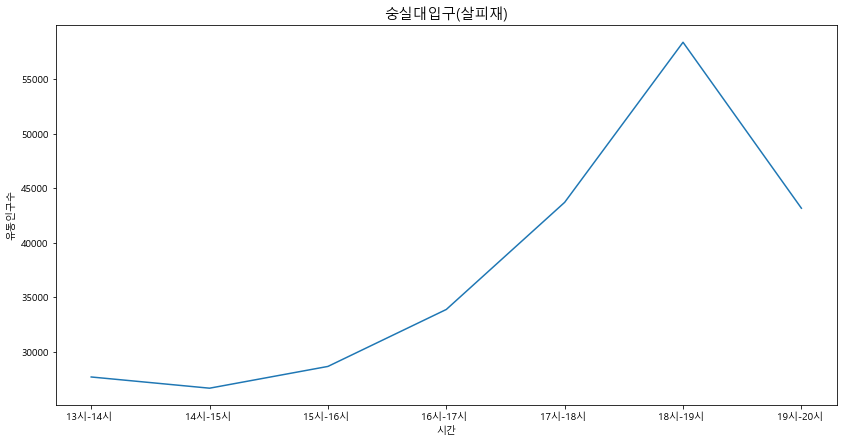

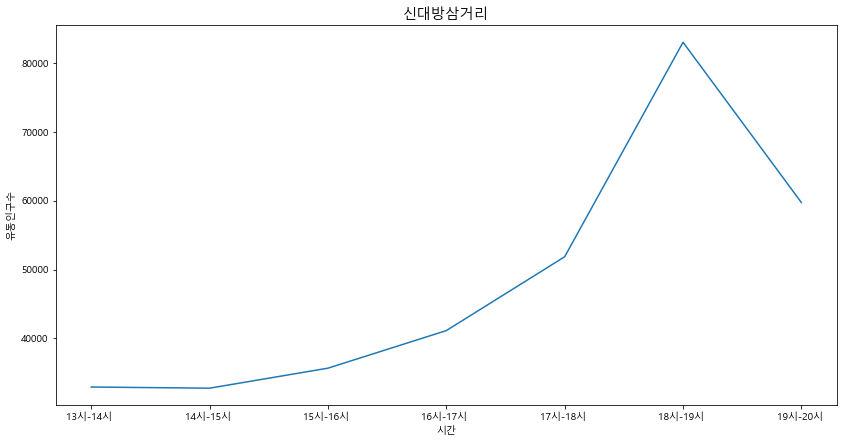

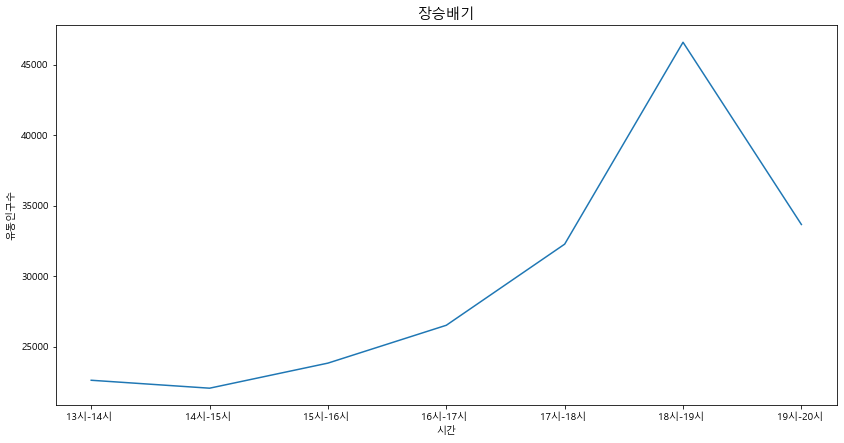

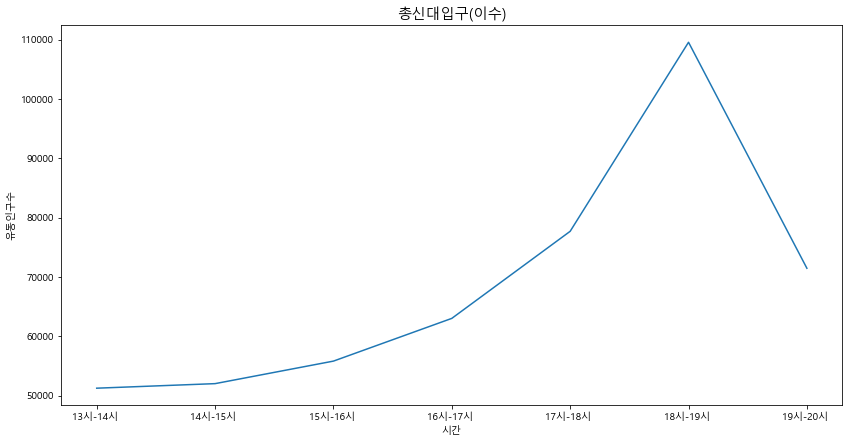

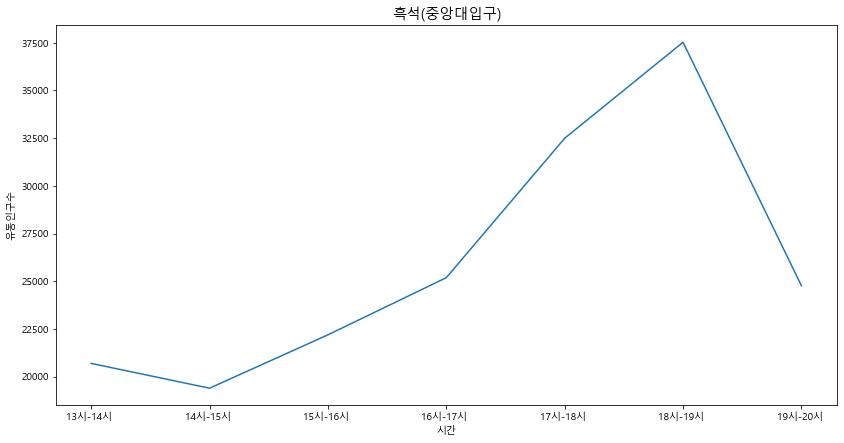

In [29]:
#1) 지하철 역별 그래프 그리기_merged_계속 figsize 바꾸면 다른 그래프로 출력됨.(for loop)
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/MALGUN.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(14, 7))
plt.xlabel('시간')
plt.ylabel('유동인구수')
plt.title('코로나 이후 지하철 역별 유동인구 그래프', fontsize='x-large')

for i in range(len(after_mean.index)):
    df_plot_merged = after_mean.iloc[i, 1:]
    plt.plot(df_plot_merged, label = after_mean['지하철역'][i])
    plt.legend(fontsize='medium')
    
#2) 지하철 역별 그래프_separated
for j in range(len(after_mean.index)):
    df_plot_separated = after_mean.iloc[j, 1:]
    plt.figure(figsize=(14, 7))
    plt.plot(df_plot_separated)
    plt.title(after_mean['지하철역'][j], fontsize='x-large')
    plt.xlabel('시간')
    plt.ylabel('유동인구수')
    plt.show()

## 2.4 코로나 이전과 이후 각 지하철 역별 유동인구 그래프 비교 

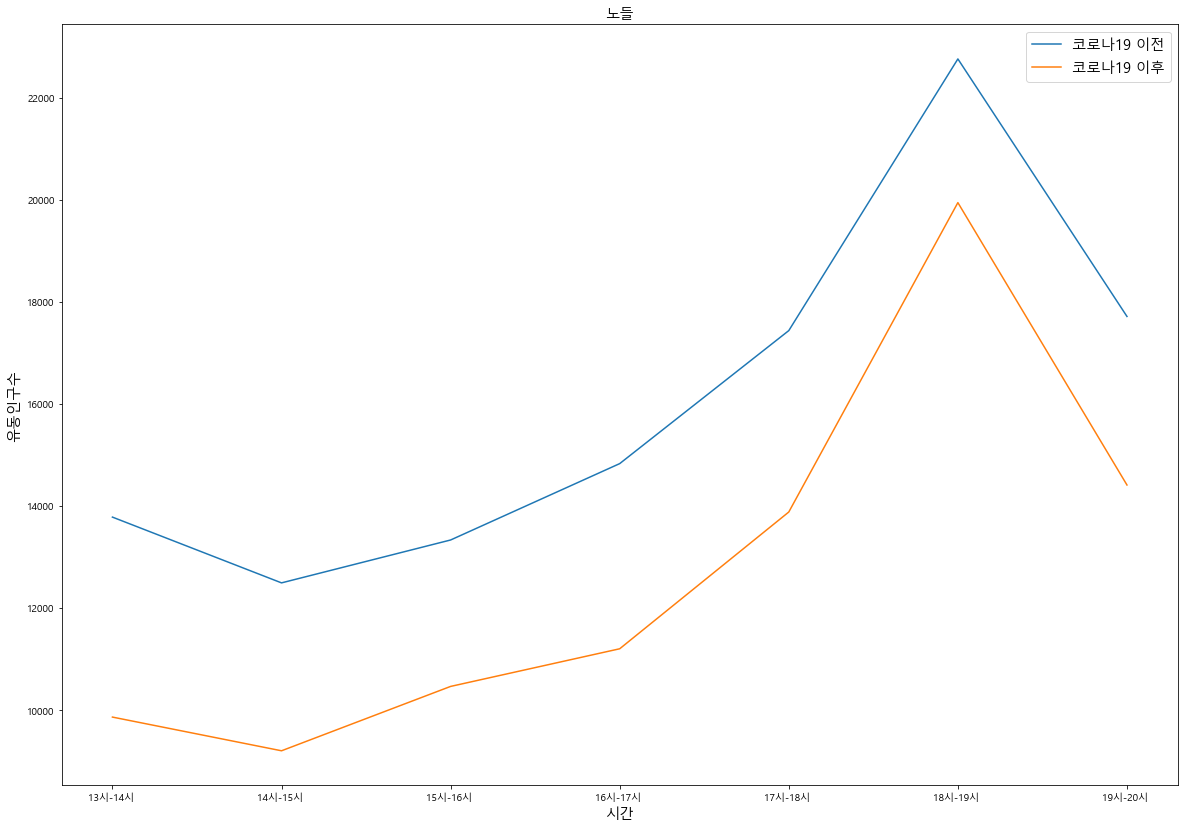

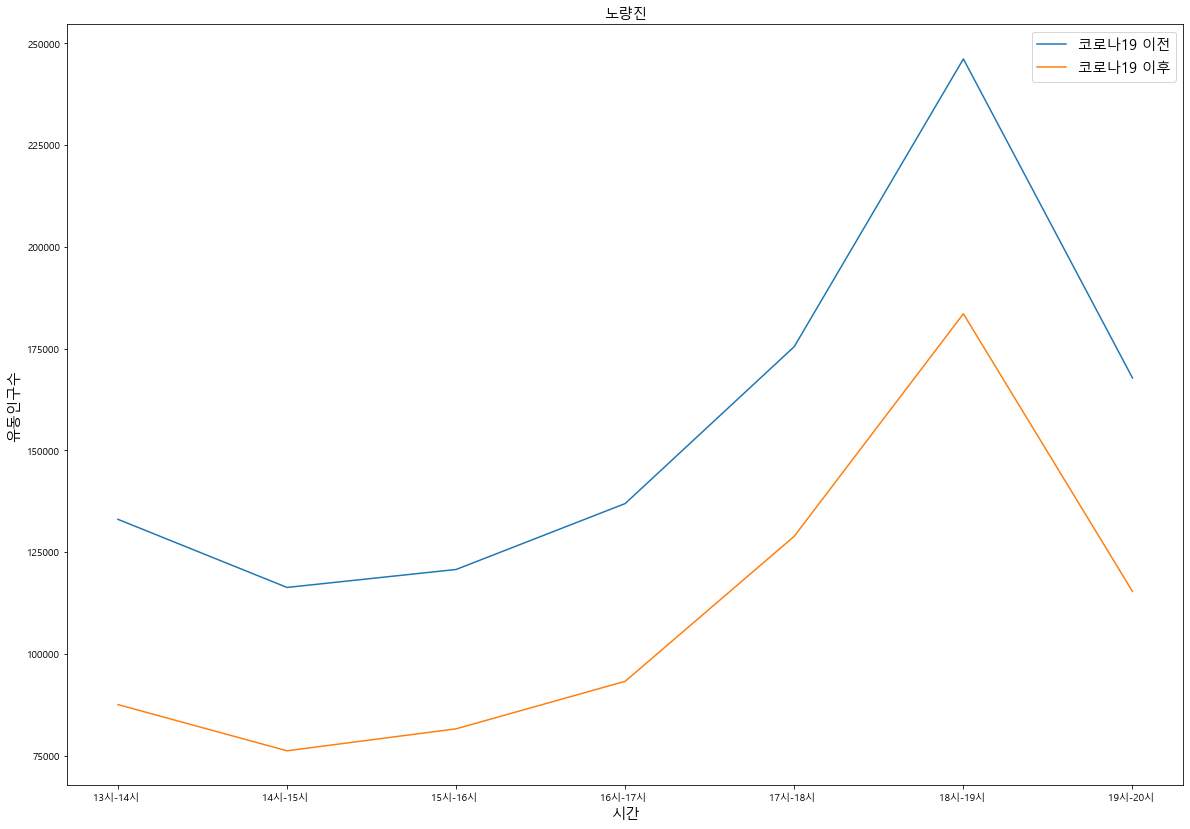

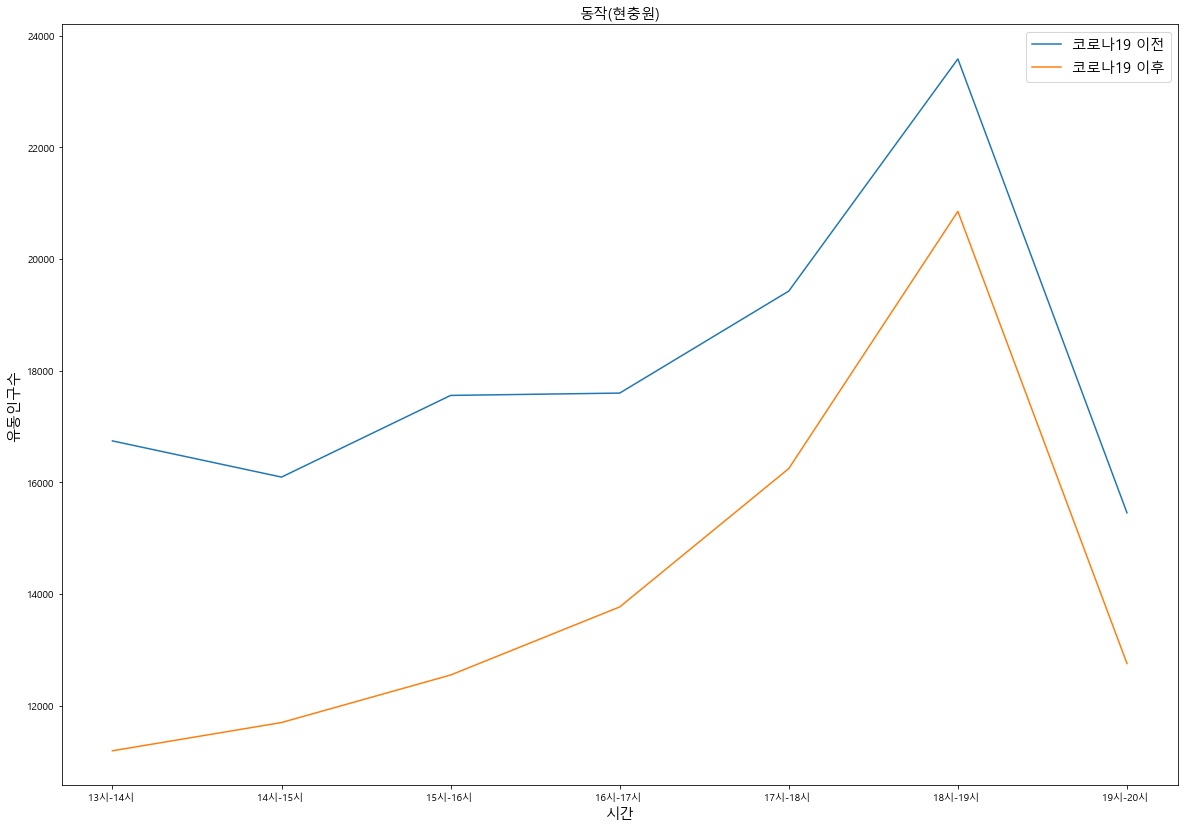

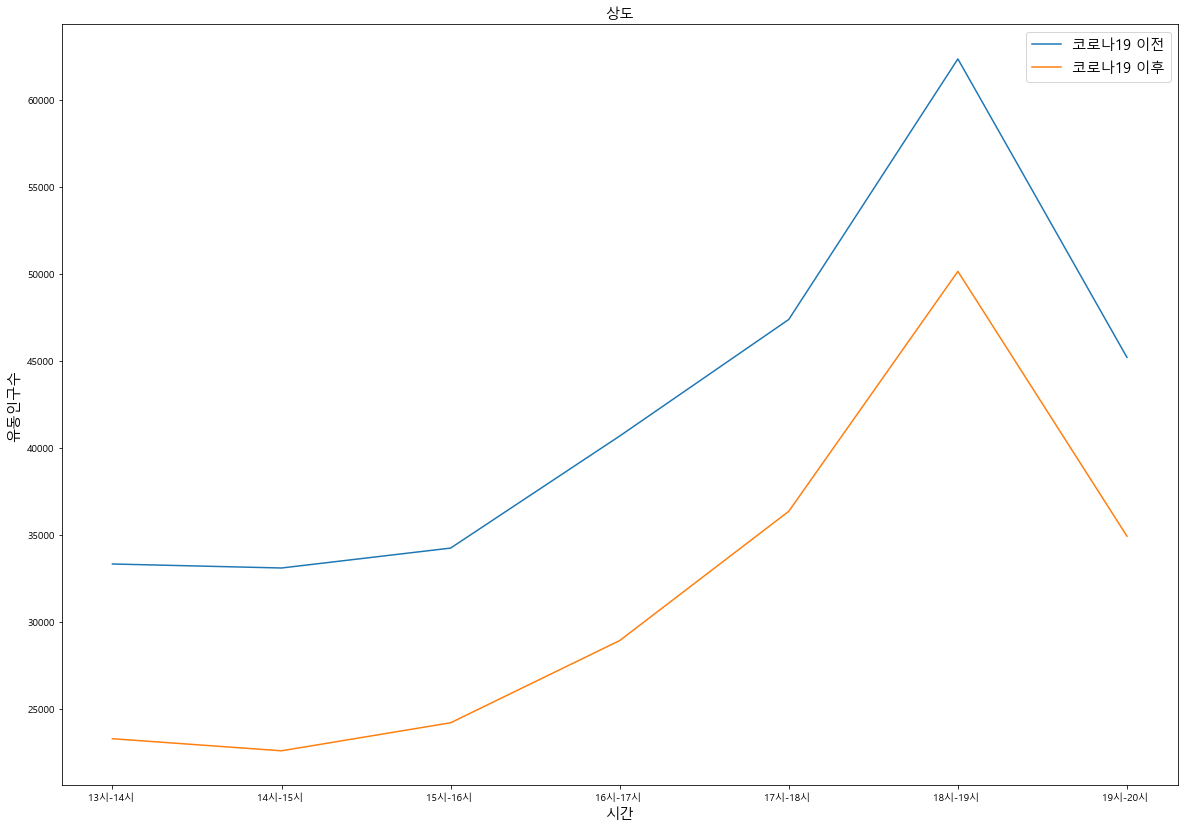

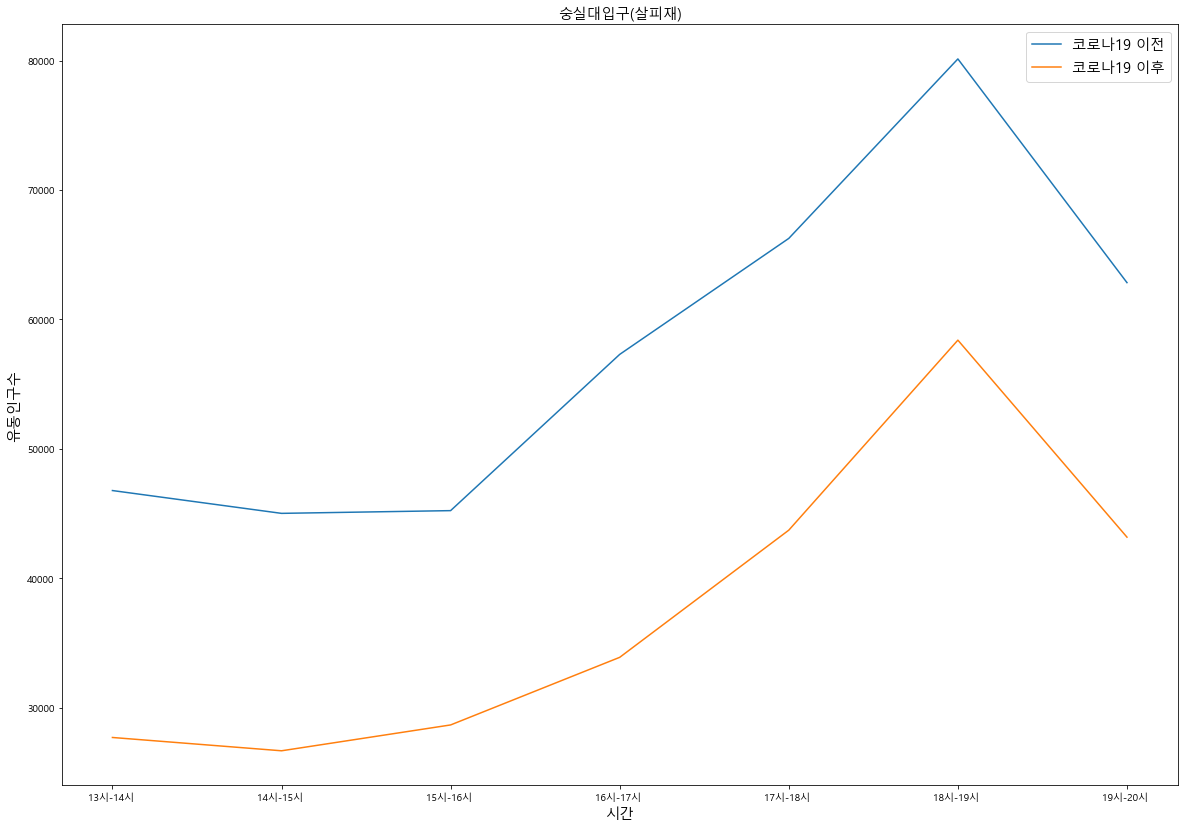

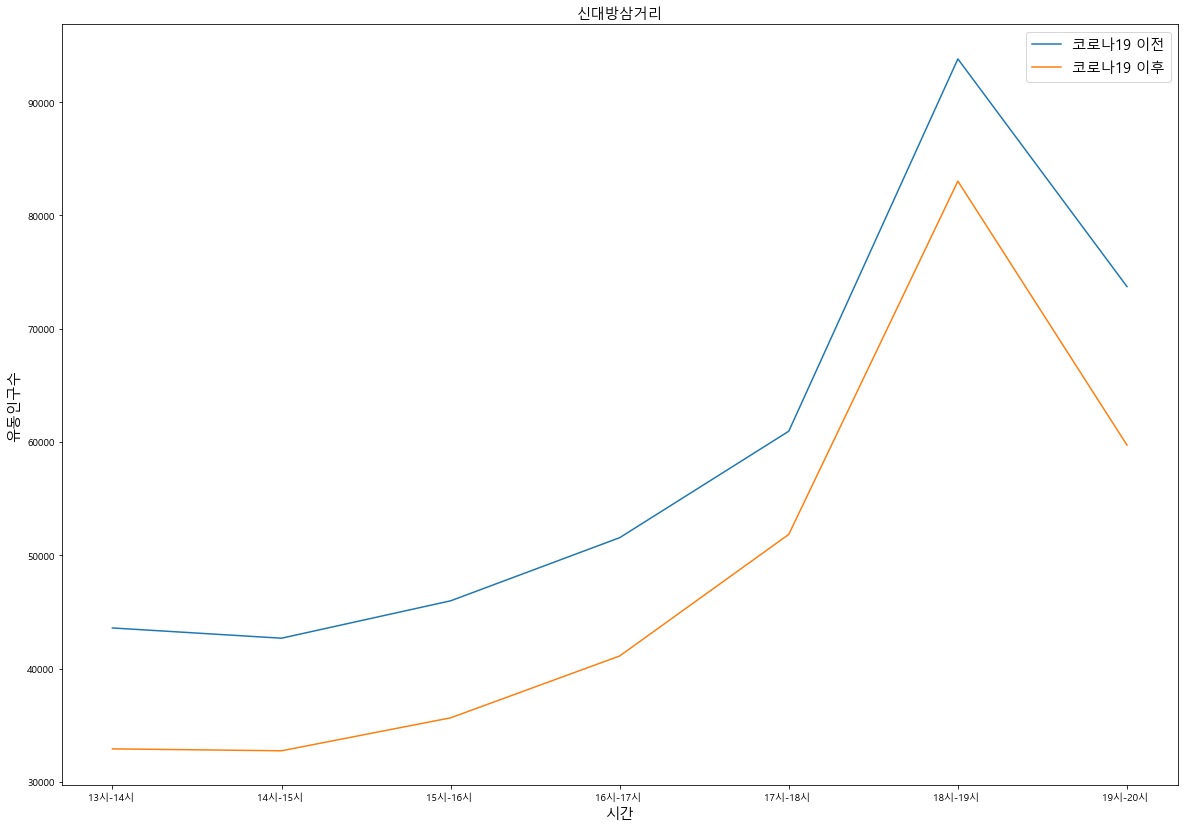

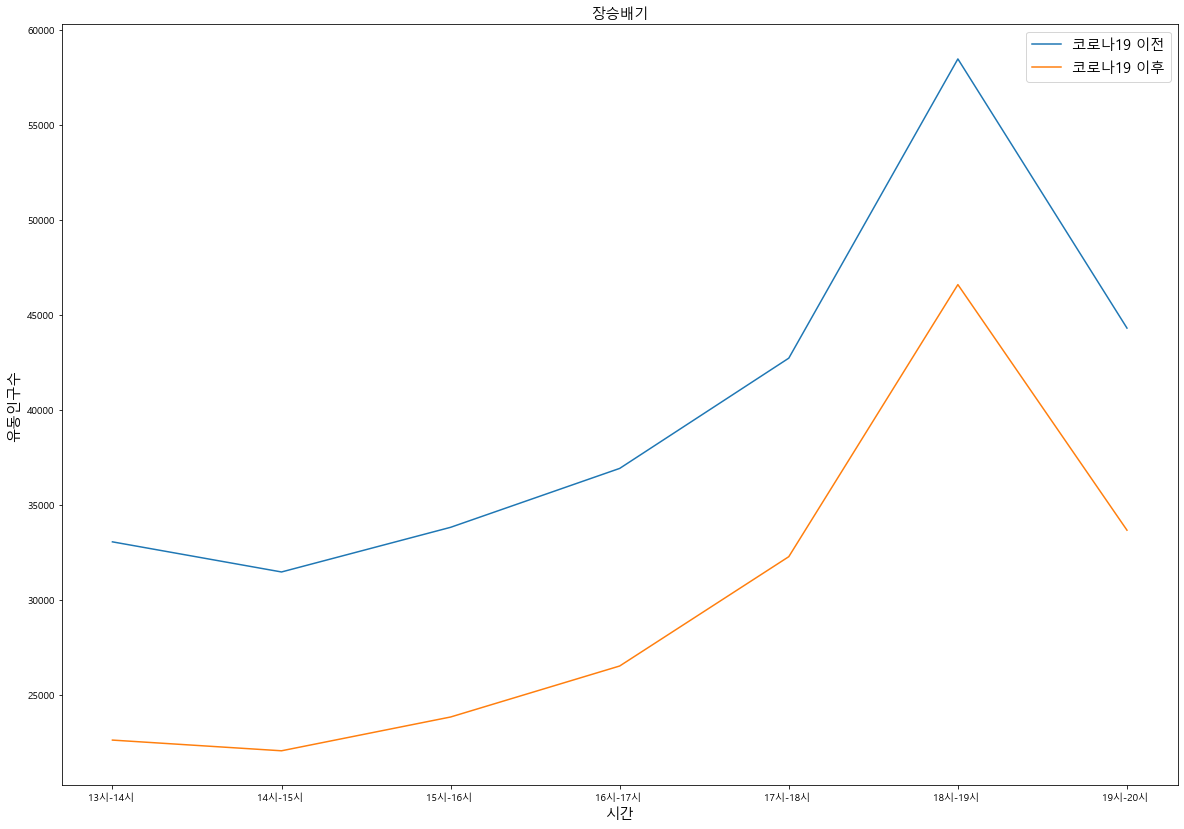

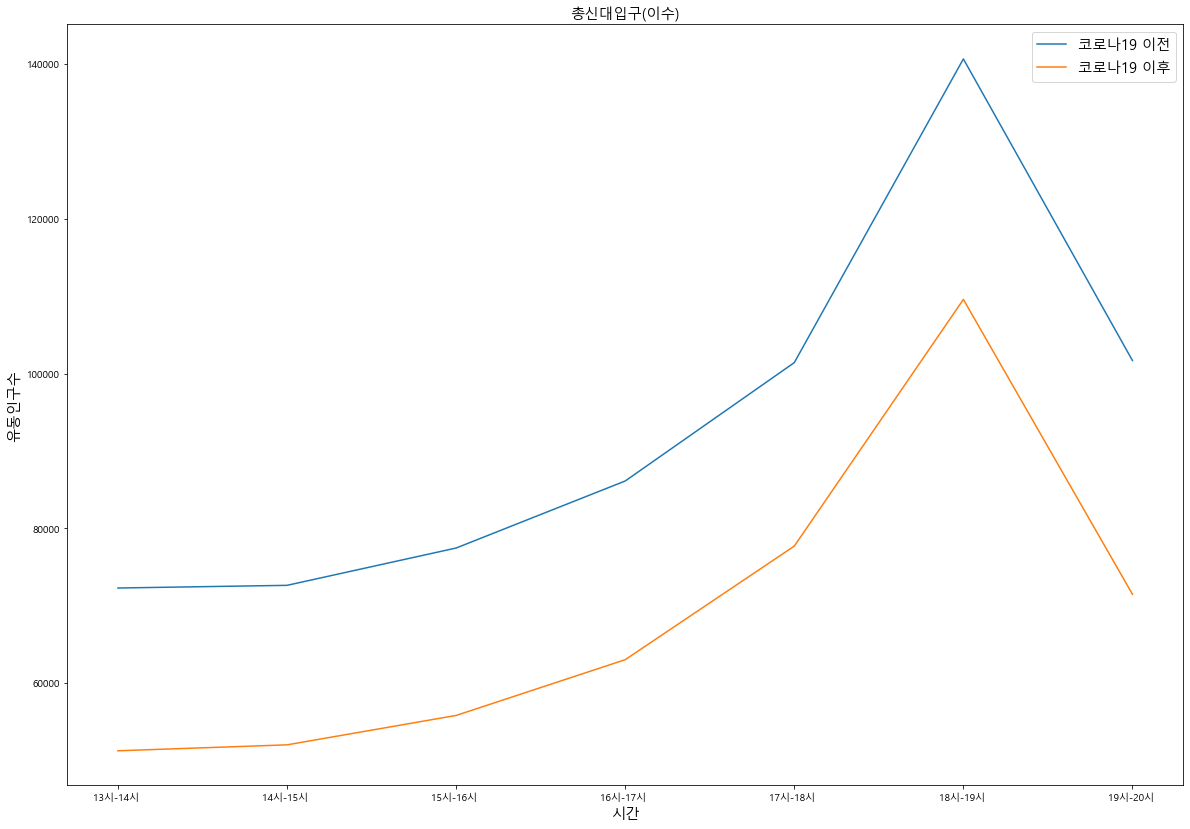

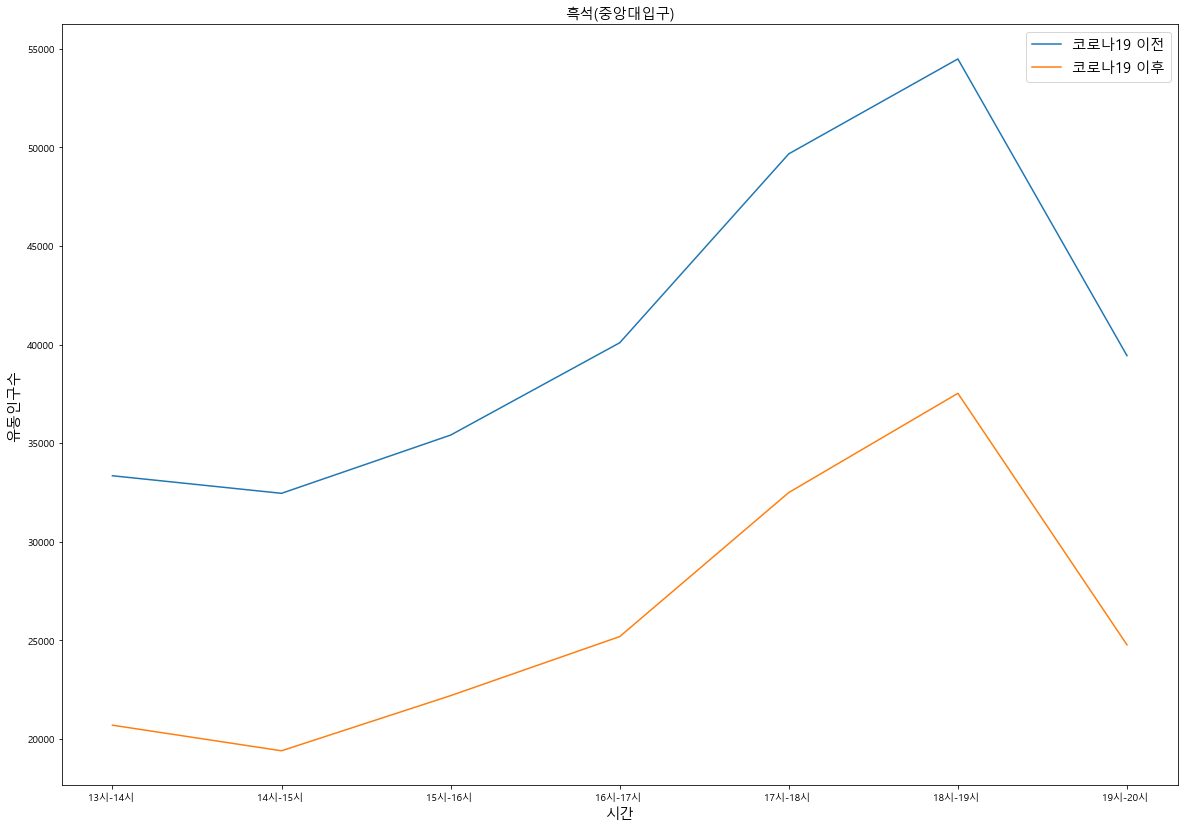

In [30]:
for k in range(len(before_mean.index)):
    df_plot_separated_comp1 = before_mean.iloc[k, 1:]
    df_plot_separated_comp2 = after_mean.iloc[k, 1:]
    plt.figure(figsize=(20, 14))
    plt.plot(df_plot_separated_comp1, label = '코로나19 이전')
    plt.plot(df_plot_separated_comp2, label = '코로나19 이후')
    plt.title(after_mean['지하철역'][k], fontsize='x-large')
    plt.xlabel('시간', fontsize = 'x-large')
    plt.ylabel('유동인구수', fontsize = 'x-large')
    plt.legend(fontsize='x-large')
    plt.show()